# Intro to unsupervised learning: Gaussian Mixture Models

- Gaussian Mixture Models are probabilistic models and use the soft clustering approach for distributing the points in different clusters.
- For a given set of data points, our GMM would identify the probability of each data point belonging a defined amount of distributions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
plt.rcParams['figure.figsize'] = (8, 6)

In [2]:
df = sns.load_dataset('penguins')

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


- Due to visualization limitations we will cluster accoring to 2 parameters, the flipper length and body mass

In [4]:
penguins = df[['flipper_length_mm', 'body_mass_g', 'sex', 'species']]
penguins = penguins.dropna().reset_index(drop=True)

In [5]:
penguins.head()

,flipper_length_mm,body_mass_g,sex,species
0,181.0,3750.0,Male,Adelie
1,186.0,3800.0,Female,Adelie
2,195.0,3250.0,Female,Adelie
3,193.0,3450.0,Female,Adelie
4,190.0,3650.0,Male,Adelie


Separate numeric paramenters for scaling

In [6]:
pen_stats = penguins[['flipper_length_mm', 'body_mass_g']]

Scale the data in order remove bias from any parameter that has a much larger magnitude 

In [7]:
scaler = MinMaxScaler()
pens = scaler.fit_transform(pen_stats)

In [17]:
pens

array([[0.15254237, 0.29166667],
       [0.23728814, 0.30555556],
       [0.38983051, 0.15277778],
       [0.3559322 , 0.20833333],
       [0.30508475, 0.26388889],
       [0.15254237, 0.25694444],
       [0.38983051, 0.54861111],
       [0.16949153, 0.13888889],
       [0.3220339 , 0.30555556],
       [0.44067797, 0.47222222],
       [0.22033898, 0.27777778],
       [0.38983051, 0.20833333],
       [0.42372881, 0.5       ],
       [0.20338983, 0.17361111],
       [0.37288136, 0.41666667],
       [0.03389831, 0.19444444],
       [0.13559322, 0.25      ],
       [0.28813559, 0.30555556],
       [0.22033898, 0.34722222],
       [0.13559322, 0.30555556],
       [0.25423729, 0.30555556],
       [0.18644068, 0.23611111],
       [0.25423729, 0.13888889],
       [0.        , 0.125     ],
       [0.13559322, 0.34722222],
       [0.10169492, 0.15277778],
       [0.10169492, 0.33333333],
       [0.27118644, 0.16666667],
       [0.20338983, 0.33333333],
       [0.38983051, 0.17361111],
       [0.

Create dataframe from scaled data

In [8]:
pen_df = pd.DataFrame(pens, columns=['flipper_length_mm', 'body_mass_g'])

Add sex and species columns to scaled data

In [9]:
pen_df['sex']=penguins['sex']
pen_df['species']=penguins['species']

In [10]:
pen_df.head()

,flipper_length_mm,body_mass_g,sex,species
0,0.152542,0.291667,Male,Adelie
1,0.237288,0.305556,Female,Adelie
2,0.389831,0.152778,Female,Adelie
3,0.355932,0.208333,Female,Adelie
4,0.305085,0.263889,Male,Adelie


Visualize data with no labels to see if an clusters are obivous

Text(0.5, 1.0, 'Scaled Penguins Data with no labels on sex or species')

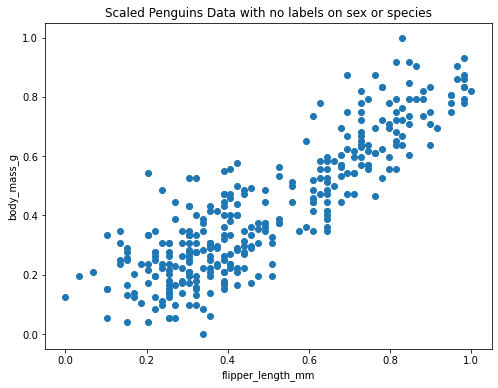

In [11]:
plt.scatter(pens[:,0], pens[:,1])
plt.xlabel("flipper_length_mm")
plt.ylabel("body_mass_g")
plt.title("Scaled Penguins Data with no labels on sex or species")

- First we define the number of groups that we want to divide the population into – that’s the value of n_components. 
- here we use 6 since there are 3 species and each species is broken down into 2 sexes

In [12]:
gmm = GaussianMixture(n_components=6)
gmm.fit(pens)

GaussianMixture(n_components=6)

Add the preddictions (which cluster the pengiun belongs to) to the dataframe for visuialization later


In [13]:
labels = gmm.predict(pens)
pen_df['cluster'] = labels

In [14]:
pen_df.head()

,flipper_length_mm,body_mass_g,sex,species,cluster
0,0.152542,0.291667,Male,Adelie,5
1,0.237288,0.305556,Female,Adelie,2
2,0.389831,0.152778,Female,Adelie,3
3,0.355932,0.208333,Female,Adelie,3
4,0.305085,0.263889,Male,Adelie,2


## Visualize Gaussiean Mixture Model results


Text(0.5, 1.0, 'GMM with Scaled Penguins Data (flipper and mass) and six clusters')

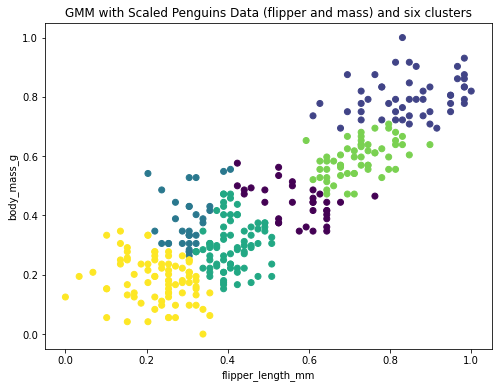

In [15]:
plt.scatter(pen_df['flipper_length_mm'], pen_df['body_mass_g'], c=pen_df['cluster'])
plt.xlabel("flipper_length_mm")
plt.ylabel("body_mass_g")
plt.title("GMM with Scaled Penguins Data (flipper and mass) and six clusters")

## Plot actual results to compare

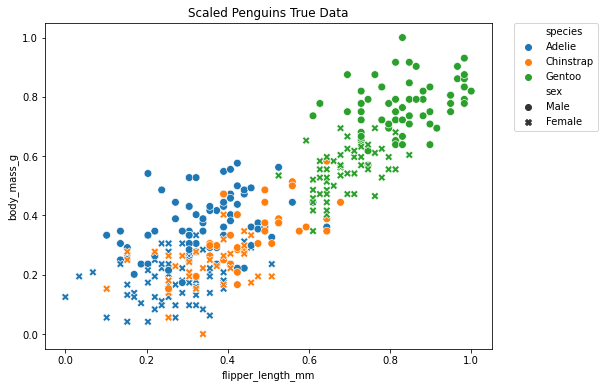

In [16]:
sns.scatterplot(x="flipper_length_mm", y="body_mass_g",
                data=pen_df, 
                hue="species",
                style="sex",
                s=60)
plt.xlabel("flipper_length_mm")
plt.ylabel("body_mass_g")
plt.title("Scaled Penguins True Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)